In [1]:
import cv2
import os

# Folder containing the images
folder_path ="image_for_weiner"

# Initialize a list to store the images
images = []

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        # Read the image using OpenCV
        image_path = os.path.join(folder_path, filename)
        img = cv2.imread(image_path)
        if img is not None:
            # Append the image to the list
            images.append(img)
        else:
            print(f"Error reading image: {image_path}")


In [2]:
import numpy as np
images=np.array(images)
images.shape

(5088, 631, 284, 3)

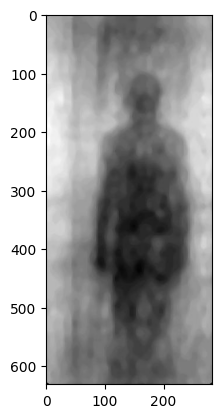

In [3]:
import matplotlib.pyplot as plt
plt.imshow(images[1],cmap='gray')
plt.show()

In [4]:
'''from skimage.io import imread
from skimage import color, data, restoration
from scipy.signal import convolve2d
from skimage.util import random_noise
k = 10
weiner_img_train=[]
for i in range(5088):
    img = color.rgb2gray(images[i])
    psf = np.ones((k,k)) / (k*k)
    img1 = convolve2d(img, psf, 'same')
    imgRestor2 = restoration.wiener(img1, psf=psf, balance=0.35)
    weiner_img_train.append(imgRestor2)'''



"from skimage.io import imread\nfrom skimage import color, data, restoration\nfrom scipy.signal import convolve2d\nfrom skimage.util import random_noise\nk = 10\nweiner_img_train=[]\nfor i in range(5088):\n    img = color.rgb2gray(images[i])\n    psf = np.ones((k,k)) / (k*k)\n    img1 = convolve2d(img, psf, 'same')\n    imgRestor2 = restoration.wiener(img1, psf=psf, balance=0.35)\n    weiner_img_train.append(imgRestor2)"

In [5]:
'''weiner_img_train=np.array(weiner_img_train)
import matplotlib.pyplot as plt
plt.imshow(weiner_img_train[1],cmap='gray')
plt.show()'''

"weiner_img_train=np.array(weiner_img_train)\nimport matplotlib.pyplot as plt\nplt.imshow(weiner_img_train[1],cmap='gray')\nplt.show()"

In [6]:
'''def wiener_filter(img, kernel, K):
    kernel /= np.sum(kernel)
    dummy = np.copy(img)
    kernel = np.pad(kernel, [(0, dummy.shape[0] - kernel.shape[0]), (0, dummy.shape[1] - kernel.shape[1])], 'constant')
    dummy = fft2(dummy)
    kernel = fft2(kernel)
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    dummy = dummy * kernel
    dummy = np.abs(ifft2(dummy))
    return dummy'''

def wiener_filter(img, kernel, K):
    # Normalize the kernel
    kernel /= np.sum(kernel)
    
    # Convert the input image to grayscale if it's in color
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Copy the image
    dummy = np.copy(img)
    
    # Pad the kernel to match the image size
    padded_kernel = np.pad(kernel, [(0, dummy.shape[0] - kernel.shape[0]), 
                                    (0, dummy.shape[1] - kernel.shape[1])], 'constant')
    
    # Compute the Fourier transforms of the image and the kernel
    dummy_fft = fft2(dummy)
    kernel_fft = fft2(padded_kernel)
    
    # Compute the inverse filter
    kernel_fft = np.conj(kernel_fft) / (np.abs(kernel_fft) ** 2 + K)
    
    # Apply the filter in the frequency domain
    dummy_fft = dummy_fft * kernel_fft
    
    # Compute the inverse Fourier transform
    dummy = np.abs(ifft2(dummy_fft))
    
    return dummy
def add_gaussian_noise(img, sigma):
    gauss = np.random.normal(0, sigma, np.shape(img))
    noisy_img = img + gauss
    #noisy_img[noisy_img < 0] = 0
    #noisy_img[noisy_img > 255] = 255
    return noisy_img

def gaussian_kernel(kernel_size = 5):
    h = gaussian(kernel_size, kernel_size / 5).reshape(kernel_size, 1)
    h = np.dot(h, h.transpose())
    h /= np.sum(h)
    return h

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [ ]:
import os
import cv2
weiner_img_train=[]
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d

'''mu, sigma = 0, 0.05
noiseA = np.random.normal(mu, sigma, size=(195,125))
X_train_folds_s1_noise = images + noiseA
print(X_train_folds_s1_noise.shape)

plt.imshow(X_train_folds_s1_noise[2], cmap='gray')
plt.show()'''

input_folder = "image_for_weiner"

# Path to the folder where filtered images will be saved
output_folder = "train_weiner"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Generate Gaussian kernel
kernel = gaussian_kernel(30)

# Loop through each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg"):
        # Read the image
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)

        # Apply Weiner filter
        weiner_img = wiener_filter(image, kernel, K=100)

        # Constructing the path for the image in the train_weiner directory
        output_path = os.path.join(output_folder, filename)

        # Save the filtered image
        plt.imshow(weiner_img, cmap='gray')  # Assuming the image is grayscale
        plt.axis('off')  # Turn off axes
        plt.savefig(output_path, bbox_inches='tight', pad_inches=0)  # Save the image
        plt.close()  # Close the plot to release memory


        print(f"Image {filename} saved to train_weiner folder.")

print("Filtering complete.")

'''for i in range(5088):
    weiner_img = wiener_filter(images[i], kernel, K = 100)
    weiner_img_train.append(weiner_img)
    file_name = f"{i+1}.jpg"
    # Constructing the path for the image in the train_weiner directory
    img_path = os.path.join('train_weiner', file_name)
    # Saving the image
    plt.imshow(weiner_img, cmap='gray')  # Assuming the image is grayscale
    plt.axis('off')  # Turn off axes
    plt.savefig(img_path, bbox_inches='tight', pad_inches=0)  # Save the image
    plt.close()  # Close the plot to release memory
    print(f"Image {i+1}/{len(images)} saved to train_weiner folder.")'''


In [7]:
import os
import cv2
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d
input_folder = "val_image_for_weiner"

# Path to the folder where filtered images will be saved
output_folder = "val_weiner"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Generate Gaussian kernel
kernel = gaussian_kernel(30)

# Loop through each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg"):
        # Read the image
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)

        # Apply Weiner filter
        weiner_img = wiener_filter(image, kernel, K=100)

        # Constructing the path for the image in the train_weiner directory
        output_path = os.path.join(output_folder, filename)

        # Save the filtered image
        plt.imshow(weiner_img, cmap='gray')  # Assuming the image is grayscale
        plt.axis('off')  # Turn off axes
        plt.savefig(output_path, bbox_inches='tight', pad_inches=0)  # Save the image
        plt.close()  # Close the plot to release memory


        print(f"Image {filename} saved to val_weiner folder.")

print("Filtering complete.")

/tmp/ipykernel_68372/624422942.py:49: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  h = gaussian(kernel_size, kernel_size / 5).reshape(kernel_size, 1)


Image 5608.jpg saved to val_weiner folder.
Image 5145.jpg saved to val_weiner folder.
Image 5568.jpg saved to val_weiner folder.
Image 5121.jpg saved to val_weiner folder.
Image 5332.jpg saved to val_weiner folder.
Image 5454.jpg saved to val_weiner folder.
Image 5673.jpg saved to val_weiner folder.
Image 5457.jpg saved to val_weiner folder.
Image 5190.jpg saved to val_weiner folder.
Image 5316.jpg saved to val_weiner folder.
Image 5639.jpg saved to val_weiner folder.
Image 5283.jpg saved to val_weiner folder.
Image 5515.jpg saved to val_weiner folder.
Image 5495.jpg saved to val_weiner folder.
Image 5226.jpg saved to val_weiner folder.
Image 5444.jpg saved to val_weiner folder.
Image 5627.jpg saved to val_weiner folder.
Image 5324.jpg saved to val_weiner folder.
Image 5685.jpg saved to val_weiner folder.
Image 5317.jpg saved to val_weiner folder.
Image 5569.jpg saved to val_weiner folder.
Image 5574.jpg saved to val_weiner folder.
Image 5348.jpg saved to val_weiner folder.
Image 5230.

Image 5603.jpg saved to val_weiner folder.
Image 5225.jpg saved to val_weiner folder.
Image 5367.jpg saved to val_weiner folder.
Image 5690.jpg saved to val_weiner folder.
Image 5194.jpg saved to val_weiner folder.
Image 5610.jpg saved to val_weiner folder.
Image 5458.jpg saved to val_weiner folder.
Image 5477.jpg saved to val_weiner folder.
Image 5519.jpg saved to val_weiner folder.
Image 5189.jpg saved to val_weiner folder.
Image 5460.jpg saved to val_weiner folder.
Image 5110.jpg saved to val_weiner folder.
Image 5296.jpg saved to val_weiner folder.
Image 5532.jpg saved to val_weiner folder.
Image 5711.jpg saved to val_weiner folder.
Image 5425.jpg saved to val_weiner folder.
Image 5682.jpg saved to val_weiner folder.
Image 5723.jpg saved to val_weiner folder.
Image 5705.jpg saved to val_weiner folder.
Image 5365.jpg saved to val_weiner folder.
Image 5104.jpg saved to val_weiner folder.
Image 5546.jpg saved to val_weiner folder.
Image 5493.jpg saved to val_weiner folder.
Image 5293.

Image 5478.jpg saved to val_weiner folder.
Image 5592.jpg saved to val_weiner folder.
Image 5577.jpg saved to val_weiner folder.
Image 5578.jpg saved to val_weiner folder.
Image 5354.jpg saved to val_weiner folder.
Image 5382.jpg saved to val_weiner folder.
Image 5487.jpg saved to val_weiner folder.
Image 5505.jpg saved to val_weiner folder.
Image 5360.jpg saved to val_weiner folder.
Image 5253.jpg saved to val_weiner folder.
Image 5120.jpg saved to val_weiner folder.
Image 5106.jpg saved to val_weiner folder.
Image 5491.jpg saved to val_weiner folder.
Image 5426.jpg saved to val_weiner folder.
Image 5193.jpg saved to val_weiner folder.
Image 5131.jpg saved to val_weiner folder.
Image 5299.jpg saved to val_weiner folder.
Image 5374.jpg saved to val_weiner folder.
Image 5285.jpg saved to val_weiner folder.
Image 5455.jpg saved to val_weiner folder.
Image 5524.jpg saved to val_weiner folder.
Image 5679.jpg saved to val_weiner folder.
Image 5234.jpg saved to val_weiner folder.
Image 5664.

Image 5625.jpg saved to val_weiner folder.
Image 5536.jpg saved to val_weiner folder.
Image 5450.jpg saved to val_weiner folder.
Image 5187.jpg saved to val_weiner folder.
Image 5687.jpg saved to val_weiner folder.
Image 5547.jpg saved to val_weiner folder.
Image 5385.jpg saved to val_weiner folder.
Image 5302.jpg saved to val_weiner folder.
Image 5105.jpg saved to val_weiner folder.
Image 5202.jpg saved to val_weiner folder.
Image 5107.jpg saved to val_weiner folder.
Image 5718.jpg saved to val_weiner folder.
Image 5168.jpg saved to val_weiner folder.
Image 5465.jpg saved to val_weiner folder.
Image 5345.jpg saved to val_weiner folder.
Image 5472.jpg saved to val_weiner folder.
Image 5138.jpg saved to val_weiner folder.
Image 5335.jpg saved to val_weiner folder.
Image 5263.jpg saved to val_weiner folder.
Image 5303.jpg saved to val_weiner folder.
Image 5237.jpg saved to val_weiner folder.
Image 5278.jpg saved to val_weiner folder.
Image 5416.jpg saved to val_weiner folder.
Image 5599.

In [ ]:
input_folder = "test_image_for_weiner"

# Path to the folder where filtered images will be saved
output_folder = "test_weiner"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Generate Gaussian kernel
kernel = gaussian_kernel(30)

# Loop through each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg"):
        # Read the image
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)

        # Apply Weiner filter
        weiner_img = wiener_filter(image, kernel, K=100)

        # Constructing the path for the image in the train_weiner directory
        output_path = os.path.join(output_folder, filename)

        # Save the filtered image
        plt.imshow(weiner_img, cmap='gray')  # Assuming the image is grayscale
        plt.axis('off')  # Turn off axes
        plt.savefig(output_path, bbox_inches='tight', pad_inches=0)  # Save the image
        plt.close()  # Close the plot to release memory


        print(f"Image {filename} saved to test_weiner folder.")

print("Filtering complete.")

In [ ]:
weiner_img_train=np.array(weiner_img_train)
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.imshow(weiner_img_train[4],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(images[4],cmap='gray')
plt.show()

In [ ]:
import os
import cv2  # Assuming you're using OpenCV to work with images

# Create the directory if it doesn't exist
if not os.path.exists('train_weiner'):
    os.makedirs('train_weiner')

# Assuming weiner_img_train is a NumPy array containing images
for i, img in enumerate(weiner_img_train):
    # Constructing the file name (i.jpg)
    file_name = f"{i+1}.jpg"
    # Constructing the path for the image in the train_weiner directory
    img_path = os.path.join('train_weiner', file_name)
    # Saving the image
    cv2.imwrite(img_path, img)
    print(f"Image {i+1}/{len(weiner_img_train)} saved to train_weiner folder.")


In [ ]:
!nvidia-smi

In [ ]:
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'


In [ ]:

model=YOLO("yolov8m.yaml")

In [ ]:

results = model.train(data='data.yaml', epochs=100, imgsz=640, device=[0, 1])

In [ ]:
!yolo task=detect mode=val model='http://localhost:8888/edit/Desktop/khalid_weapon_temper/best.pt' data=data.yaml

In [ ]:
!yolo task=detect mode=predict model='http://localhost:8888/edit/Desktop/khalid_weapon_temper/best.pt'source='/Desktop/khalid_weapon_temper/test_dataset/images/5777.jpg'

In [ ]:
model=YOLO('http://localhost:8888/edit/Desktop/khalid_weapon/runs/detect/train18/weights/best.pt')

In [ ]:
from ultralytics import Model

# Initialize the YOLO model with the correct task (e.g., 'predict' or 'detect')
model = Model(task='detect')
result=model.predict('http://localhost:8888/view/Desktop/khalid_weapon/test_dataset/images/image_0006.jpg',save=True,imgsz=640, conf=0.5)

In [ ]:
#cuda_device = 0
#device = torch.device(f'cuda:{cuda_device}' if torch.cuda.is_available() else 'cpu')


In [ ]:
'''from poutyne import ModelBundle
import yaml
from torchvision import datasets

# Load data from data.yaml
with open("data.yaml", "r") as file:
    data = yaml.safe_load(file)

# Extract dataset paths and other information
dataset_root_dir = data["path"]
train_dataset_path = data["train"]
val_dataset_path = data["val"]
num_classes = data["nc"]
class_names = data["names"]

def load_dataset(dataset_path):
    dataset = datasets.ImageFolder(root=dataset_path)
    return dataset

# Load your datasets using the specified paths (you need to implement this part)
train_dataset = load_dataset(train_dataset_path)
val_dataset = load_dataset(val_dataset_path)

# Now create your network (assuming 'network' is defined somewhere in your code)
network=YOLO("yolov8m.yaml")

# Assuming 'device' is already defined
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create a ModelBundle
model_bundle = ModelBundle.from_network(
    './saves/my_classification_network',  # Use the specified path
    network, 
    optimizer=None,  # Use None instead of 'None'
    task='regression', 
    device=device
)

# Train your model using the loaded datasets
model_bundle.train_data(
    train_dataset=train_dataset, 
    val_dataset=val_dataset, 
    batch=16, 
    epochs=100, 
    amp=False
)'''


In [ ]:
network=YOLO("yolov8m.yaml")

'''model = Model(
    network,
    optimizer=None,  # You can omit optimizer
    loss_function=None,  # You can omit loss function
    batch_metrics=['accuracy'],
    epoch_metrics=['f1'],
    device=device
)
#model= nn.DataParallel(model)
#model.to(device)
#yolo train model=yolov8m.pt data=data.yaml epochs=1000 imgsz=640
#model=YOLO("yolov8m.yaml")'''

In [ ]:
from poutyne import ModelBundle
import yaml

# Load data from data.yaml
with open("data.yaml", "r") as file:
    data = yaml.safe_load(file)

x = data["X"]  # Assuming your input data is stored under the key "X" in the YAML file
y = data["Y"]  # Assuming your labels are stored under the key "Y" in the YAML file

# Everything is saved in ./saves/my_classification_network
model_bundle = ModelBundle.from_network(
    './saves/my_classification_network', network, optimizer=None, task='regression', device=device
)

model_bundle.train_data(x, y, batch=16, epochs=100, amp=False)


In [ ]:
#results=model.train(data="data.yaml",batch= 16, epochs=100, amp=False)
from poutyne import ModelBundle

# Everything is saved in ./saves/my_classification_network
model_bundle = ModelBundle.from_network(
    './saves/my_classification_network', network, optimizer=None, task='regression', device=device
)

model_bundle.train_data(data="data.yaml",batch= 16, epochs=100, amp=False)

In [ ]:
yolo task=detect mode=val model=/runs/detect/train/weights/best.pt data=data.yaml

In [ ]:
yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source=1.jpg show=True

In [ ]:
from google.colab import files

# Download the zip file
files.download('/content/runs.zip')


In [ ]:
import shutil
import os

# Define the path to the folder you want to download
folder_path = '/content/runs'

# Define the destination path for the zip file
zip_file_path = '/content/runs.zip'

# Create a zip file of the folder
shutil.make_archive('/content/runs', 'zip', folder_path)

# Move the zip file to the destination path
shutil.move('/content/runs.zip', zip_file_path)
